<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(0)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_0'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,73.285598,90.492009,-3.066140,170.711466,173.853515,-3.142049
1,0.0,1.0,78.224365,71.504446,-0.542434,159.186377,159.746777,-0.560400
2,0.0,2.0,82.510208,98.817934,-0.130349,191.197793,191.408514,-0.210721
3,0.0,3.0,32.364824,49.137973,1.736230,93.239027,91.547531,1.691495
4,0.0,4.0,36.782453,61.690156,-0.560123,107.912486,108.541522,-0.629036
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,23.443661,69.901182,1.104729,104.449572,103.218133,1.231439
119996,999.0,116.0,27.020199,57.926652,-1.390611,93.556240,94.882140,-1.325901
119997,999.0,117.0,85.618733,77.465554,1.264713,174.349001,173.098321,1.250680
119998,999.0,118.0,70.637414,53.375372,0.325801,134.338587,134.089629,0.248958


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    73.285598  90.492009 -3.066140  170.711466  173.853515 -3.142049
      1.0    78.224365  71.504446 -0.542434  159.186377  159.746777 -0.560400
      2.0    82.510208  98.817934 -0.130349  191.197793  191.408514 -0.210721
      3.0    32.364824  49.137973  1.736230   93.239027   91.547531  1.691495
      4.0    36.782453  61.690156 -0.560123  107.912486  108.541522 -0.629036
...                ...        ...       ...         ...         ...       ...
999.0 115.0  23.443661  69.901182  1.104729  104.449572  103.218133  1.231439
      116.0  27.020199  57.926652 -1.390611   93.556240   94.882140 -1.325901
      117.0  85.618733  77.465554  1.264713  174.349001  173.098321  1.250680
      118.0  70.637414  53.375372  0.325801  134.338587  134.089629  0.248958
      119.0  68.470341  95.213343 -0.836021  172.847663  173.572747 -0.725084

[120000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    73.285598  90.492009 -3.066140  170.711466  173.853515 -3.142049
      1.0    78.224365  71.504446 -0.542434  159.186377  159.746777 -0.560400
      2.0    82.510208  98.817934 -0.130349  191.197793  191.408514 -0.210721
      3.0    32.364824  49.137973  1.736230   93.239027   91.547531  1.691495
      4.0    36.782453  61.690156 -0.560123  107.912486  108.541522 -0.629036
...                ...        ...       ...         ...         ...       ...
999.0 115.0  23.443661  69.901182  1.104729  104.449572  103.218133  1.231439
      116.0  27.020199  57.926652 -1.390611   93.556240   94.882140 -1.325901
      117.0  85.618733  77.465554  1.264713  174.349001  173.098321  1.250680
      118.0  70.637414  53.375372  0.325801  134.338587  134.089629  0.248958
      119.0  68.470341  95.213343 -0.836021  172.847663  173.572747 -0.725084

[120000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,73.285598,90.492009,-3.066140,170.711466,173.853515,-3.142049
1,0.0,1.0,78.224365,71.504446,-0.542434,159.186377,159.746777,-0.560400
2,0.0,2.0,82.510208,98.817934,-0.130349,191.197793,191.408514,-0.210721
3,0.0,3.0,32.364824,49.137973,1.736230,93.239027,91.547531,1.691495
4,0.0,4.0,36.782453,61.690156,-0.560123,107.912486,108.541522,-0.629036
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,23.443661,69.901182,1.104729,104.449572,103.218133,1.231439
119996,999.0,116.0,27.020199,57.926652,-1.390611,93.556240,94.882140,-1.325901
119997,999.0,117.0,85.618733,77.465554,1.264713,174.349001,173.098321,1.250680
119998,999.0,118.0,70.637414,53.375372,0.325801,134.338587,134.089629,0.248958


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    73.285598  90.492009 -3.066140  170.711466  173.853515 -3.142049
      1.0    78.224365  71.504446 -0.542434  159.186377  159.746777 -0.560400
      2.0    82.510208  98.817934 -0.130349  191.197793  191.408514 -0.210721
      3.0    32.364824  49.137973  1.736230   93.239027   91.547531  1.691495
      4.0    36.782453  61.690156 -0.560123  107.912486  108.541522 -0.629036
...                ...        ...       ...         ...         ...       ...
999.0 115.0  23.443661  69.901182  1.104729  104.449572  103.218133  1.231439
      116.0  27.020199  57.926652 -1.390611   93.556240   94.882140 -1.325901
      117.0  85.618733  77.465554  1.264713  174.349001  173.098321  1.250680
      118.0  70.637414  53.375372  0.325801  134.338587  134.089629  0.248958
      119.0  68.470341  95.213343 -0.836021  172.847663  173.572747 -0.725084

[120000 rows x 6 columns]

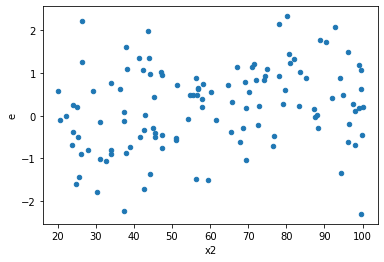

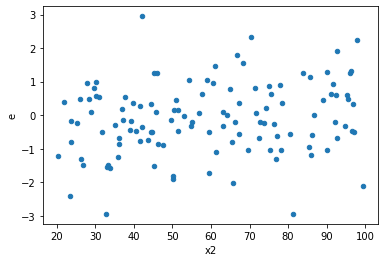

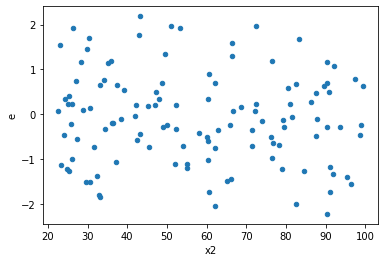

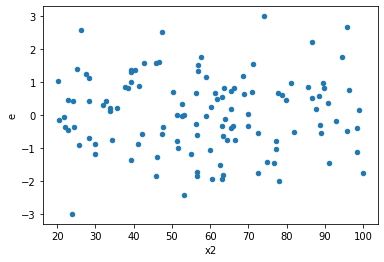

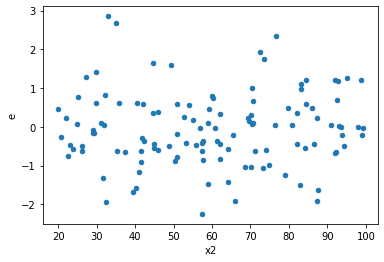

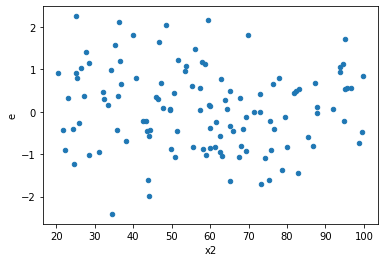

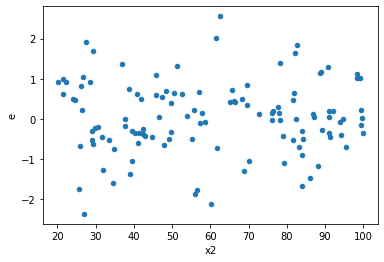

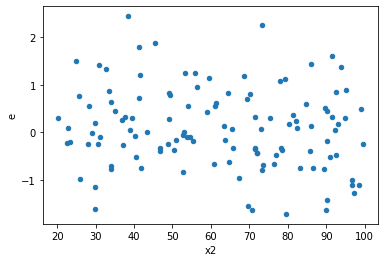

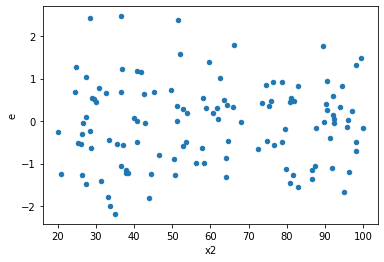

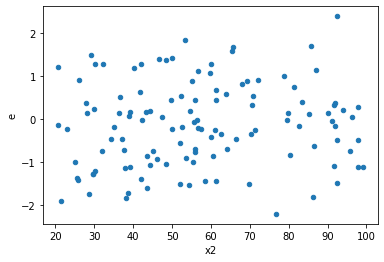

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,78.0,38.0,83.68779326107109,51.941051129779844,1.0729204264239884,1.3668697665731537,1.2739712404664432,0.41414453758283054,0.7929277312085847,0.20707226879141527,Reject005=1 : Homoscedasticity
6.0,60.0,56.0,44.082167429282116,58.996318530418186,0.7347027904880352,1.053505688043182,1.4339209020063446,0.1750273610697055,0.9124863194651472,0.08751368053485276,Reject005=1 : Homoscedasticity
7.0,75.0,41.0,52.974904134480305,36.79184869957411,0.7063320551264041,0.8973621634042466,1.2704536866072942,0.4066756582747466,0.7966621708626267,0.2033378291373733,Reject005=1 : Homoscedasticity
14.0,62.0,54.0,48.898491206322895,53.45419345200911,0.7886853420374661,0.989892471333502,1.2551171152442664,0.39517215995594634,0.8024139200220268,0.19758607997797317,Reject005=1 : Homoscedasticity
17.0,52.0,64.0,33.77761575842583,42.41704670731316,0.6495695338158813,0.6627663548017682,1.020316256072483,0.9322615125733038,0.5338692437133481,0.4661307562866519,Reject005=1 : Homoscedasticity
18.0,64.0,52.0,52.10853427255698,55.49868235109762,0.8141958480087028,1.0672823529057234,1.310842293676638,0.3147241897080444,0.8426379051459778,0.1573620948540222,Reject005=1 : Homoscedasticity
19.0,63.0,53.0,53.74748905894711,55.28430170569112,0.8531347469674144,1.0431000321828514,1.2226673874094274,0.45387127824267504,0.7730643608786625,0.22693563912133752,Reject005=1 : Homoscedasticity
22.0,54.0,62.0,45.62074043220257,79.77298554528103,0.8448285265222698,1.2866610571819521,1.5229848623583802,0.10980011695098568,0.9450999415245072,0.05490005847549284,Reject005=1 : Homoscedasticity
25.0,59.0,57.0,52.532153530756716,61.955173452136954,0.8903754835721477,1.08693286758135,1.2207578573711653,0.45107762828141373,0.7744611858592931,0.22553881414070687,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,78.0,38.0,83.68779326107109,51.941051129779844,1.0729204264239884,1.3668697665731537,1.2739712404664432,0.41414453758283054,Reject005=1 : Homoscedasticity
1.0,51.0,65.0,53.19951977799825,51.67934337756222,1.0431278387842793,0.7950668211932649,0.762194998189178,0.31522172957558575,Reject005=1 : Homoscedasticity
2.0,65.0,51.0,54.833835004611174,31.161319225472557,0.8435974616094026,0.6110062593229914,0.7242865076399385,0.21869721229609296,Reject005=1 : Homoscedasticity
3.0,59.0,57.0,56.192375464155276,46.99484454435033,0.952413143460259,0.8244709569184269,0.8656652447308748,0.583435284953566,Reject005=1 : Homoscedasticity
4.0,48.0,68.0,61.307891364005776,50.002043232853204,1.2772477367501203,0.7353241651890177,0.5757098987389914,0.04520061756021324,Reject005=0 : Heteroscedasticity
5.0,64.0,52.0,66.79768963887877,48.02793795991954,1.0437139006074807,0.9236141915369143,0.884930430647073,0.6376701305109539,Reject005=1 : Homoscedasticity
6.0,60.0,56.0,44.082167429282116,58.996318530418186,0.7347027904880352,1.053505688043182,1.4339209020063446,0.1750273610697055,Reject005=1 : Homoscedasticity
7.0,75.0,41.0,52.974904134480305,36.79184869957411,0.7063320551264041,0.8973621634042466,1.2704536866072942,0.4066756582747466,Reject005=1 : Homoscedasticity
8.0,56.0,60.0,47.743017578118824,48.96115856788136,0.8525538853235505,0.8160193094646894,0.957146901224905,0.8706076917364479,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      934
Reject005=0 : Heteroscedasticity     66
Name: Result_test, dtype: int64